In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('User_Data.csv')

In [5]:
data.head()
# data.pop('User ID')
# data.pop('Gender')

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [6]:
data.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
X = data.drop(['Purchased'],axis = 1)
y = data['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [10]:
X_train.dtypes

Age                int64
EstimatedSalary    int64
dtype: object

In [11]:
X_train.describe()

,Age,EstimatedSalary
count,320.00000,320.000000
mean,38.21875,69928.125000
std,10.30304,34570.057299
min,18.00000,15000.000000
25%,30.00000,43000.000000
50%,38.00000,69500.000000
75%,46.00000,88000.000000
max,60.00000,150000.000000


In [12]:
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,Age,EstimatedSalary
count,320.000000,320.000000
mean,0.481399,0.406875
std,0.245310,0.256074
min,0.000000,0.000000
25%,0.285714,0.207407
50%,0.476190,0.403704
75%,0.666667,0.540741
max,1.000000,1.000000


In [13]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred_test = logreg.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9250


In [16]:
y_pred_train = logreg.predict(X_train)

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7969


In [18]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7969
Test set score: 0.9250


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[58  0]
 [ 6 16]]

True Positives(TP) =  58

True Negatives(TN) =  16

False Positives(FP) =  0

False Negatives(FN) =  6


<AxesSubplot:>

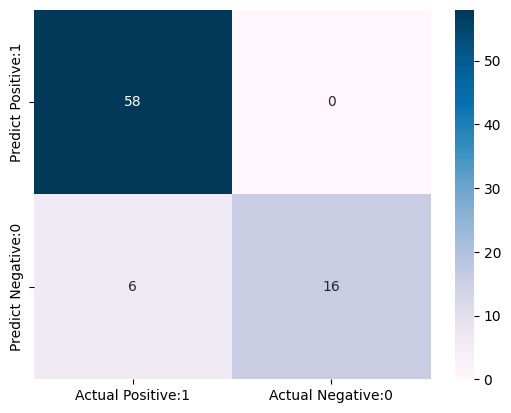

In [31]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBu')

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80

